# Exploratory Data Analysis

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from clean_dataset import import_csv_data
from scipy.stats import lognorm, norm
import scipy.stats as stats
from clean_immo_datasetV2 import encode_categorical_features, preprocess_missing_values

#### Load CSV

In [87]:
file_path = 'ml_ready_real_estate_data.csv'
raw_df = import_csv_data(file_path)
raw_df

,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
0,2.0,1.0,100.0,1.0,1040,1.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,399000.0
1,4.0,2.0,270.0,3.0,1040,0.0,1,2,2,951.0,...,0,0,1,0,1,0,0,0,1,895000.0
2,2.0,1.0,87.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,0,0,0,1,0,0,1,465000.0
3,2.0,2.0,104.0,2.0,1040,0.0,1,1,1,551.0,...,0,0,0,0,0,1,0,0,1,590000.0
4,1.0,1.0,71.0,1.0,1040,0.0,1,1,3,951.0,...,0,0,0,0,0,0,0,0,0,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,4.0,2.0,242.0,2.0,9990,3.0,5,2,2,2106.0,...,1,0,0,0,0,0,0,0,0,649000.0
76099,3.0,1.0,94.0,1.0,1090,0.0,1,1,1,1652.0,...,0,0,1,0,0,1,0,0,1,279000.0
76100,3.0,1.0,113.0,1.0,1853,0.0,4,1,1,1243.0,...,0,0,1,0,0,1,0,0,1,299000.0
76101,3.0,2.0,111.0,2.0,8434,0.0,6,1,1,3633.0,...,0,0,0,0,0,1,0,0,1,325000.0


#### Optional encoding

In [104]:
df_wo_missing = preprocess_missing_values(raw_df)


 Preprocessing missing values...


In [105]:
df_wo_missing

,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
0,2.0,1.0,100.0,1.0,1040,1.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,399000.0
1,4.0,2.0,270.0,3.0,1040,0.0,1,2,2,951.0,...,0,0,1,0,1,0,0,0,1,895000.0
2,2.0,1.0,87.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,0,0,0,1,0,0,1,465000.0
3,2.0,2.0,104.0,2.0,1040,0.0,1,1,1,551.0,...,0,0,0,0,0,1,0,0,1,590000.0
4,1.0,1.0,71.0,1.0,1040,0.0,1,1,3,951.0,...,0,0,0,0,0,0,0,0,0,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,4.0,2.0,242.0,2.0,9990,3.0,5,2,2,2106.0,...,1,0,0,0,0,0,0,0,0,649000.0
76099,3.0,1.0,94.0,1.0,1090,0.0,1,1,1,1652.0,...,0,0,1,0,0,1,0,0,1,279000.0
76100,3.0,1.0,113.0,1.0,1853,0.0,4,1,1,1243.0,...,0,0,1,0,0,1,0,0,1,299000.0
76101,3.0,2.0,111.0,2.0,8434,0.0,6,1,1,3633.0,...,0,0,0,0,0,1,0,0,1,325000.0


In [106]:

df_encoded, encoders = encode_categorical_features(df_wo_missing)



 Starting categorical encoding...

 Encoding provinces...

 Encoding property types...

 Encoding property subtypes...

 Encoding localities...
No locality column found or all values are null

 Encoding EPC scores...

 Encoding boolean features...


In [107]:
encoders

{'province_mapping': {'Brussels': 1,
  'Luxembourg': 2,
  'Antwerp': 3,
  'FlemishBrabant': 4,
  'EastFlanders': 5,
  'WestFlanders': 6,
  'Liège': 7,
  'WalloonBrabant': 8,
  'Limburg': 9,
  'Namur': 10,
  'Hainaut': 11},
 'type_mapping': {'APARTMENT': 1, 'HOUSE': 2},
 'subtype_mapping': {'APARTMENT': 1,
  'HOUSE': 2,
  'FLAT_STUDIO': 3,
  'FLATSTUDIO': 3,
  'DUPLEX': 4,
  'PENTHOUSE': 5,
  'GROUND_FLOOR': 6,
  'GROUNDFLOOR': 6,
  'APARTMENT_BLOCK': 7,
  'APARTMENTBLOCK': 7,
  'MANSION': 8,
  'EXCEPTIONAL_PROPERTY': 9,
  'EXCEPTIONALPROPERTY': 9,
  'MIXED_USE_BUILDING': 10,
  'MIXEDUSEBUILDING': 10,
  'TRIPLEX': 11,
  'LOFT': 12,
  'VILLA': 13,
  'TOWN_HOUSE': 14,
  'TOWNHOUSE': 14,
  'CHALET': 15,
  'MANOR_HOUSE': 16,
  'MANORHOUSE': 16,
  'SERVICE_FLAT': 17,
  'SERVICEFLAT': 17,
  'KOT': 18,
  'FARMHOUSE': 19,
  'BUNGALOW': 20,
  'COUNTRY_COTTAGE': 21,
  'COUNTRYCOTTAGE': 21,
  'OTHER_PROPERTY': 22,
  'OTHERPROPERTY': 22,
  'CASTLE': 23,
  'PAVILION': 24},
 'locality_encoder': None,

In [108]:
df_encoded

,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
0,2.0,1.0,100.0,1.0,1040,1.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,399000.0
1,4.0,2.0,270.0,3.0,1040,0.0,1,2,2,951.0,...,0,0,1,0,1,0,0,0,1,895000.0
2,2.0,1.0,87.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,0,0,0,1,0,0,1,465000.0
3,2.0,2.0,104.0,2.0,1040,0.0,1,1,1,551.0,...,0,0,0,0,0,1,0,0,1,590000.0
4,1.0,1.0,71.0,1.0,1040,0.0,1,1,3,951.0,...,0,0,0,0,0,0,0,0,0,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,4.0,2.0,242.0,2.0,9990,3.0,5,2,2,2106.0,...,1,0,0,0,0,0,0,0,0,649000.0
76099,3.0,1.0,94.0,1.0,1090,0.0,1,1,1,1652.0,...,0,0,1,0,0,1,0,0,1,279000.0
76100,3.0,1.0,113.0,1.0,1853,0.0,4,1,1,1243.0,...,0,0,1,0,0,1,0,0,1,299000.0
76101,3.0,2.0,111.0,2.0,8434,0.0,6,1,1,3633.0,...,0,0,0,0,0,1,0,0,1,325000.0


#### Identifying the type of variables

In [109]:
df_encoded.dtypes

bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
locality_encoded                 float64
epcScore_encoded                 float64
hasAttic_encoded                   int64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_enco

## Outliers

In [91]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [92]:
def identify_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] <= lower)], df[(df[col] >= upper)]

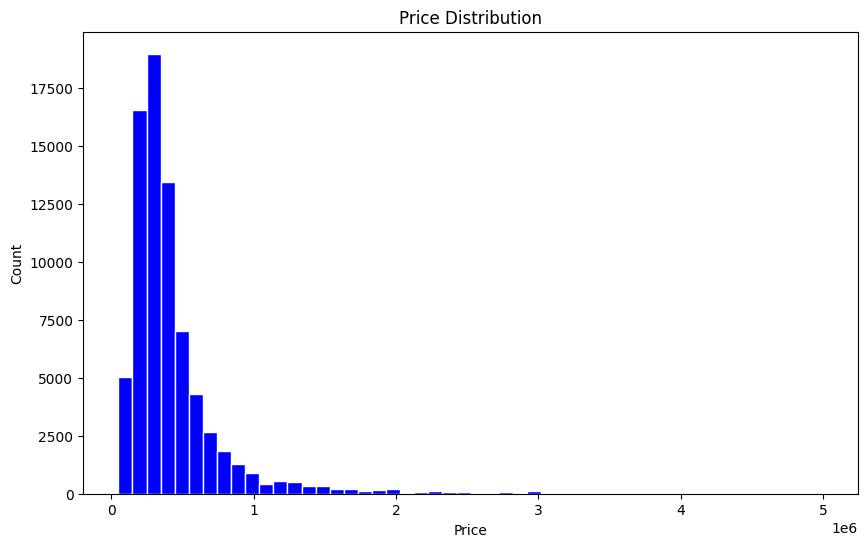

In [117]:
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['price'], bins=50, color='blue', edgecolor='white')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('images/price_distribution.png')
plt.show()

#### Outliers for price

In [94]:
df_encoded['price'].describe()

count    7.610300e+04
mean     4.351276e+05
std      4.127531e+05
min      5.000000e+04
25%      2.310000e+05
50%      3.295000e+05
75%      4.790000e+05
max      5.000000e+06
Name: price, dtype: float64

In [95]:
lower_outliers, upper_outliers = identify_outliers_iqr(df_encoded, 'price')

In [ ]:
lower_outliers

In [ ]:
upper_outliers['subtype_encoded']

In [ ]:
df_wo_price_outliers = remove_outliers_iqr(df_encoded, 'price')

In [123]:
df_wo_price_outliers['price'].describe()

count     70206.000000
mean     343889.518118
std      163700.495823
min       50000.000000
25%      225000.000000
50%      314000.000000
75%      430000.000000
max      850000.000000
Name: price, dtype: float64

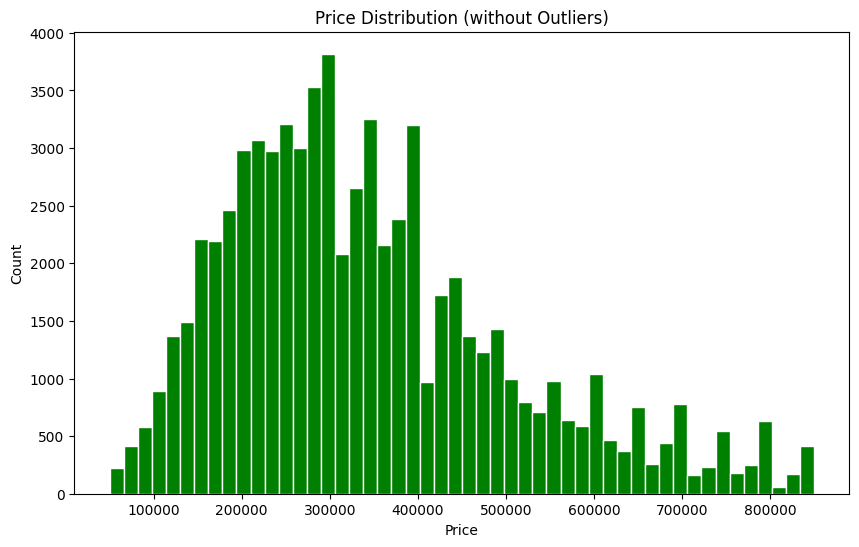

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(df_wo_price_outliers['price'], bins=50, color='green', edgecolor='white')
plt.title('Price Distribution (without Outliers)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.savefig('images/price_distribution_wout_outliers.png')
plt.show()

#### Price distribution with density line

In [99]:
data_price_ml = df_wo_price_outliers['price']

Text(87.72222222222221, 0.5, 'Count')

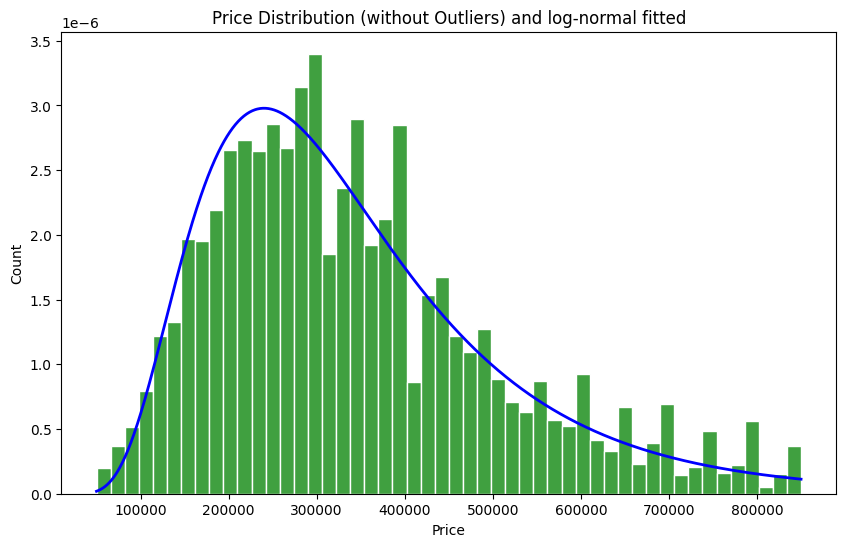

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(data_price_ml, bins=50, stat='density', color='green', edgecolor='white')

shape, loc, scale = lognorm.fit(data_price_ml, floc=0)

x = np.linspace(data_price_ml.min(), data_price_ml.max(), 1000)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

plt.plot(x, pdf, 'b', linewidth=2, label='Log-normal fit')
plt.title('Price Distribution (without Outliers) and log-normal fitted')
plt.savefig('images/price_distribution_wout_outliers_log_normal.png')
plt.xlabel('Price')
plt.ylabel('Count')

#### Analyzing Outliers

##### By Subtype

In [ ]:
num_bins = len(upper_outliers['subtype'].unique())
num_bins

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=upper_outliers, x='subtype', color='pink', edgecolor='white')
plt.xticks(rotation=90)
plt.title('Outliers price dsitribution by subtype')

## Correlation Analysis

### Correlation for Continuous variables

In [111]:
df_continuous = df_encoded.select_dtypes(include='float64')
df_continuous = df_continuous.drop(columns=['locality_encoded'])
df_continuous.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'totalParkingCount', 'epcScore_encoded', 'price'],
      dtype='object')

In [112]:
df_continuous = df_continuous.loc[:, ['price','bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'totalParkingCount', 'epcScore_encoded']]  

print(df_continuous)

          price  bedroomCount  bathroomCount  habitableSurface  toiletCount  \
0      399000.0           2.0            1.0             100.0          1.0   
1      895000.0           4.0            2.0             270.0          3.0   
2      465000.0           2.0            1.0              87.0          1.0   
3      590000.0           2.0            2.0             104.0          2.0   
4      289000.0           1.0            1.0              71.0          1.0   
...         ...           ...            ...               ...          ...   
76098  649000.0           4.0            2.0             242.0          2.0   
76099  279000.0           3.0            1.0              94.0          1.0   
76100  299000.0           3.0            1.0             113.0          1.0   
76101  325000.0           3.0            2.0             111.0          2.0   
76102  340000.0           3.0            2.0             132.0          2.0   

       totalParkingCount  epcScore_encoded  
0     

In [113]:
corr_matrix_cont = df_continuous.corr()
corr_matrix_cont

,price,bedroomCount,bathroomCount,habitableSurface,toiletCount,totalParkingCount,epcScore_encoded
price,1.000000,0.351888,0.501759,0.092090,0.355912,0.205422,0.149425
bedroomCount,0.351888,1.000000,0.483589,0.094985,0.463346,0.270342,-0.103822
bathroomCount,0.501759,0.483589,1.000000,0.070947,0.434966,0.152362,0.031866
habitableSurface,0.092090,0.094985,0.070947,1.000000,0.070528,0.050638,-0.005899
toiletCount,0.355912,0.463346,0.434966,0.070528,1.000000,0.187869,0.018833
totalParkingCount,0.205422,0.270342,0.152362,0.050638,0.187869,1.000000,-0.034511
epcScore_encoded,0.149425,-0.103822,0.031866,-0.005899,0.018833,-0.034511,1.000000


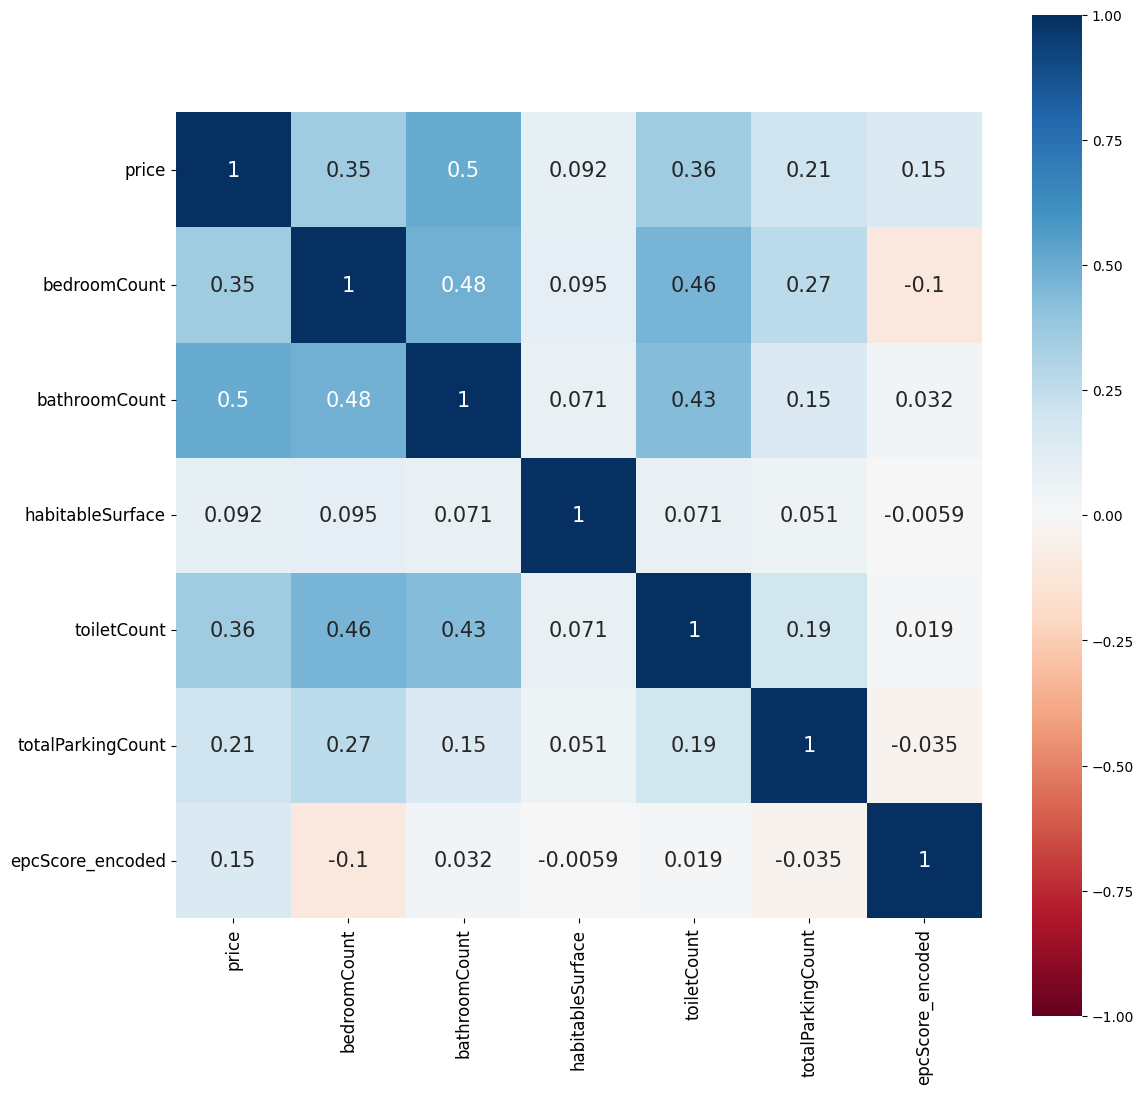

In [145]:
plt.figure(figsize=(13, 13))

heatmap = sns.heatmap(corr_matrix_cont, cmap ='RdBu', vmin =-1, vmax=1, annot =True, square = True, annot_kws = {'fontsize': 15})
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 12)
plt.savefig('images/corr_matrix_continuos.png', pad_inches = 3)
plt.show()

#### Correlation for boolean

In [ ]:
bool_cols= ['price'] + list(df_encoded.select_dtypes(include='bool').columns)
bool_cols

In [ ]:
df_boolean = df_encoded[bool_cols]

##### Analysis with Point-biserial correlation

In [ ]:
point_biserial_corr = dict()

for col in df_boolean.columns:
    point_biserial_corr[col] = stats.pointbiserialr(df_encoded[col], df_encoded['price']).statistic

In [ ]:
for k,v in point_biserial_corr.items():
    print(f"Correlation with {k} : {v}")

In [ ]:
sorted_bool_correlation = dict(sorted(point_biserial_corr.items(), key=lambda x:x[1], reverse = True))
sorted_bool_correlation 

#### Swimming Pool

In [ ]:

swimming_plot = sns.boxplot(x='hasSwimmingPool_encoded', y='price', data=df_encoded , showfliers=False )
plt.title('Price by hasSwimmingPool')
plt.show()

In [ ]:
correlation_swimm_pool = df_encoded['hasSwimmingPool_encoded'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'hasSwimmingPool': {correlation_swimm_pool}")

In [ ]:
stats.pointbiserialr(df_encoded['hasSwimmingPool'], df_encoded['price'] )

#### Province

In [ ]:
df_province =df_encoded[['price', 'province']]
df_province 

In [ ]:
df_province[['province']].value_counts()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='province', y='price', data=df_encoded,  showfliers=False )
plt.xticks(rotation=45)
plt.title('Price by Province')
plt.show()

#### Subtype

In [ ]:
df_subtype = df_encoded[['price', 'subtype', 'subtype_encoded']]
df_subtype

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subtype', y='price', data=df_subtype,  showfliers=False )
plt.xticks(rotation=60)
plt.title('Price by subtype')
plt.show()

#### Habitable Surface

In [ ]:
df_encoded['habitableSurface'].describe()

In [ ]:
df_surface = df_encoded[['habitableSurface', 'price', 'type', 'subtype']]

In [ ]:
df_surface_wo_out = remove_outliers_iqr(df_surface, 'habitableSurface')

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_surface_wo_out, x='habitableSurface', y='price',  hue='type', palette='Set2' )
plt.title('Scatter Plot: Price vs Habitable Surface ')
plt.xlabel('Habitable Surface')
plt.ylabel('Price')
plt.show()

In [ ]:
correlation_surface= df_encoded['habitableSurface'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'habitableSurface': {correlation_surface}")

##### Surface histogram

In [ ]:
df_surface_wo_out = remove_outliers_iqr(df_surface, 'habitableSurface')

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_surface_wo_out['habitableSurface'], bins=50, color='lightblue', edgecolor='black')
plt.title('Surface Distribution')
plt.xlabel('Surface')
plt.ylabel('Count')
plt.show()

#### Number of bedrooms

In [ ]:
df_encoded['bedroomCount'].value_counts()

In [ ]:
df_bedroom = df_encoded[['bedroomCount', 'price']]
df_bedroom

In [ ]:
bedroom_plot = sns.boxplot(x='bedroomCount', y='price', data=df_bedroom , showfliers=False )
plt.title('Price by bedroom')
plt.show()

In [ ]:
correlation_bedroom = df_encoded['bedroomCount'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'bedroomCount': {correlation_bedroom}")

In [ ]:
#### Number of bedrooms


In [ ]:
df_encoded['bathroomCount'].value_counts()
df_bedroom = df_encoded[['bathroomCount', 'price']]
df_bedroom


In [ ]:
bedroom_plot = sns.boxplot(x='bathroomCount', y='price', data=df_bedroom , showfliers=False )
plt.title('Price by bathroom')
plt.show()
correlation_bedroom = df_encoded['bathroomCount'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'bedroomCount': {correlation_bedroom}")